# Benign or Malignant

<hr>

## Skin Cancer: Malignant vs Benign

This dataset contains a balanced dataset of images of benign skin moles and malignant skin moles.

## Acknowledgements

All the rights of the Data are bound to the ISIC-Archive rights <a href='https://www.isic-archive.com/#!/topWithHeader/wideContentTop/main'>source</a>. I do not take any responsibility for the right-infringement of any kernels. Thus, do not monetize this any of your models done on this data :).

## What is in this notebook?

Using data analysis to do feature engineering to select features that show that a cell is Benign or Malignant. After that creating a classification model that can predict where the cell is Benign or Malignant on the basis of features selected in feature engineering.

<hr>

In [1]:
# To avoid warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

df = pd.read_csv('data.csv')
df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


* The **ID** field contains the patient identifiers. 

* The characteristics of the cell samples from each patient are contained in fields Clump to Mit. 

* The values are graded from 1 to 10, with 1 being the closest to benign.

* The Class field contains the diagnosis, as confirmed by separate medical procedures, as to whether the samples are **benign** (value = 2) or **malignant** (value = 4).

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           699 non-null    int64 
 1   Clump        699 non-null    int64 
 2   UnifSize     699 non-null    int64 
 3   UnifShape    699 non-null    int64 
 4   MargAdh      699 non-null    int64 
 5   SingEpiSize  699 non-null    int64 
 6   BareNuc      699 non-null    object
 7   BlandChrom   699 non-null    int64 
 8   NormNucl     699 non-null    int64 
 9   Mit          699 non-null    int64 
 10  Class        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


<hr>

## Data Analysis

**BareNuc** column dtype is object, most of the rows have int value which are casted to object but few rows have non-numerical data. We can just drop those rows

In [4]:
# Removing rows having non-numerical data
df = df[pd.to_numeric(df['BareNuc'], errors='coerce').notnull()]

# Converting "BareNuc" dtype to int
df['BareNuc'] = df['BareNuc'].astype('int') 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   ID           683 non-null    int64
 1   Clump        683 non-null    int64
 2   UnifSize     683 non-null    int64
 3   UnifShape    683 non-null    int64
 4   MargAdh      683 non-null    int64
 5   SingEpiSize  683 non-null    int64
 6   BareNuc      683 non-null    int64
 7   BlandChrom   683 non-null    int64
 8   NormNucl     683 non-null    int64
 9   Mit          683 non-null    int64
 10  Class        683 non-null    int64
dtypes: int64(11)
memory usage: 64.0 KB


#### Clump | UnifSize

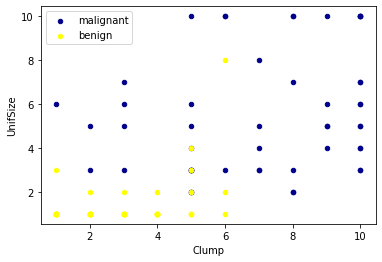

In [5]:
ax = df[df['Class'] == 4][0:50].plot(kind='scatter', x='Clump', y='UnifSize', color='DarkBlue', label='malignant');
df[df['Class'] == 2][0:50].plot(kind='scatter', x='Clump', y='UnifSize', color='Yellow', label='benign', ax=ax);
plt.show()

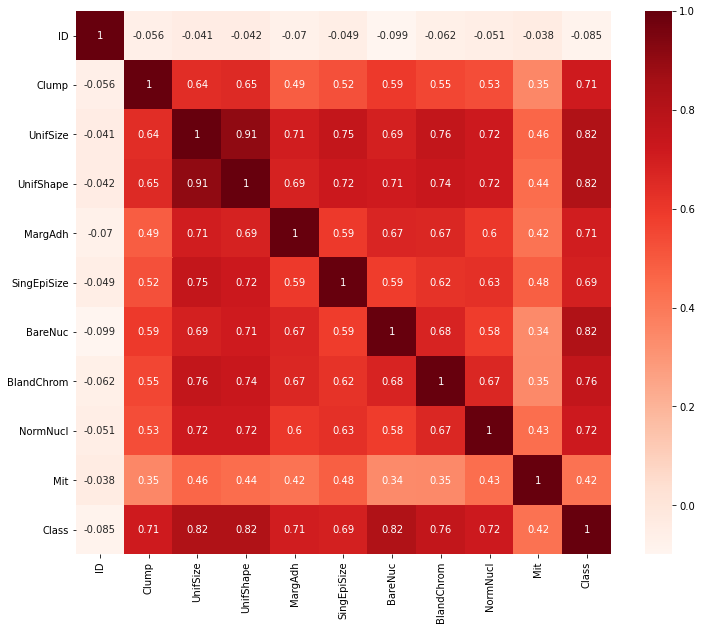

In [6]:
# Using Pearson Correlation

plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [7]:
features = df.columns.tolist()

# There is no need of 'ID' column
features.remove('ID')   

# It is our target variable and not feature variable
features.remove('Class')

target = ['Class']

print(f"Features: {features}")
print(f"Target: {target}")

Features: ['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']
Target: ['Class']


In [8]:
X = df[features]
X.head()

,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1


In [9]:
y = df[target]
y.head()

,Class
0,2
1,2
2,2
3,2
4,2


In [10]:
y['Class'].value_counts()

benign_pct = round((y['Class'].value_counts()[2] / (y['Class'].value_counts()[2] + y['Class'].value_counts()[4])), 2) * 100 
malignant_pct = round((y['Class'].value_counts()[4] / (y['Class'].value_counts()[2] + y['Class'].value_counts()[4])), 2) * 100
print(f"Our dataset contains {benign_pct}% benign data and {malignant_pct}% malignant data")

Our dataset contains 65.0% benign data and 35.0% malignant data


In [11]:
# Shuffling the dataset
df = df.sample(frac=1, random_state=3)

#### Splitting the dataset

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

In [13]:
from sklearn import svm
from sklearn.linear_model import LassoCV
from sklearn.model_selection import StratifiedKFold, cross_val_score

skf = StratifiedKFold(n_splits=3)

#### Cross Validation

In [14]:
score = cross_val_score(LassoCV(), X_train, y_train, cv=skf)
print(f'LassoCV: {score.mean()}')

score = cross_val_score(svm.SVC(), X_train, y_train, cv=skf)
print(f'SVM(SVC): {score.mean()}')

LassoCV: 0.8279870298346137
SVM(SVC): 0.9790749475890985


#### Parameter Tuning

In [15]:
from sklearn.model_selection import GridSearchCV

def svc_param_selection(X, y, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 10]
    gammas = [0.001, 0.01, 0.1, 1]
    kernels = ['linear', 'rbf']
    param_grid = {
        'C': Cs, 
        'gamma' : gammas, 
        'kernel': kernels
    }
    
    grid_search = GridSearchCV(svm.SVC(), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

skf = StratifiedKFold(n_splits=10)
best_params_ = svc_param_selection(X_train, y_train, skf)
best_params_

{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}

In [16]:
# Cross Validation
score = cross_val_score(svm.SVC(C=1, gamma=0.01, kernel='rbf'), X_train, y_train, cv=skf)
print(f'SVM(SVC): {score.mean()}')

SVM(SVC): 0.9853723404255319


<hr>

## Feature Selection

Recursive Feature Selection cannot not be done on 'rbf' kernel

#### 1) Using embedded method for feature selection

In [17]:
reg = LassoCV()
reg.fit(X_train, y_train)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X_train,y_train))
coef = pd.Series(reg.coef_, index = X_train.columns)

Best alpha using built-in LassoCV: 0.037162
Best score using built-in LassoCV: 0.849181


In [18]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 8 variables and eliminated the other 1 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

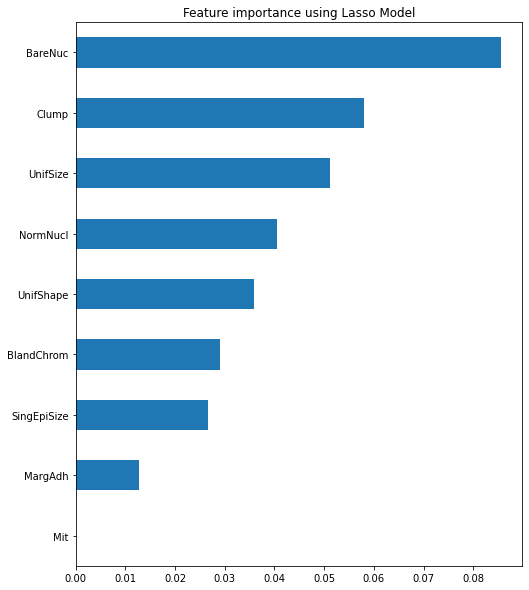

In [19]:
import matplotlib

imp_coef = coef.sort_values()
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

Here Lasso model has taken all the features, except Mit so we will remove that feature

#### 2) Using Backward Elimination for feature selection 

In [20]:
import statsmodels.api as sm

In [21]:
X_1 = sm.add_constant(X_train)

# Fitting sm.OLS model
sm_model = sm.OLS(y_train, X_1).fit()
sm_model.pvalues

const          1.751237e-149
Clump           7.591409e-13
UnifSize        1.904195e-03
UnifShape       1.546905e-02
MargAdh         1.098713e-01
SingEpiSize     5.041429e-03
BareNuc         3.041117e-25
BlandChrom      4.215394e-03
NormNucl        5.155872e-06
Mit             7.791975e-01
dtype: float64

In [22]:
# Backward Elimination
cols = list(X_train.columns)
pmax = 1

while (len(cols)>0):
    p= []
    X_1 = X_train[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y_train, X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
        
selected_features_BE = cols
print(selected_features_BE)

['Clump', 'UnifSize', 'UnifShape', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl']


#### 3) Selecting the best features from embedded method and backward elimination

In [23]:
# Now we have two sets of features 

# From embedded method
emb_features = ['Clump', 'UnifSize', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'SingEpiSize', 'MargAdh', 'UnifShape']

# From backward elimination 
bem_features = ['Clump', 'UnifSize', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl']

In [24]:
# Doing Cross Validation on emb_features

emb_X_train = X_train[emb_features]
emb_y_train = y_train.copy()

emb_cv_clf = svm.SVC(C=0.1, kernel='rbf', gamma=0.01)
scores = cross_val_score(emb_cv_clf, emb_X_train, emb_y_train, cv=skf)
emb_best_params_ = svc_param_selection(X_train, y_train, skf)
print(emb_best_params_)
print(f"Embeeded Method Features mean score: {scores.mean()}")

print()

bem_X_train = X_train[bem_features]
bem_y_train = y_train.copy()

bem_cv_clf = svm.SVC(C=0.1, kernel='rbf', gamma=0.01)
scores = cross_val_score(bem_cv_clf, bem_X_train, bem_y_train, cv=skf)
bem_best_params_ = svc_param_selection(X_train, y_train, skf)
print(bem_best_params_)
print(f"Backward Elimination Features mean score: {scores.mean()}")

{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
Embeeded Method Features mean score: 0.9791223404255319

{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
Backward Elimination Features mean score: 0.9749556737588652


In [25]:
# Selecting features which gave the highest cross-validation mean score

final_features = ['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']
target = ['Class']

X_train = X_train[final_features]
X_test = X_test[final_features]

<hr>

## Creating Model

#### Feature Scaling

In [26]:
from sklearn.preprocessing import StandardScaler

X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

#### Parameter Tunning

In [27]:
svc_param_selection(X_train, y_train, skf)

{'C': 0.1, 'gamma': 0.001, 'kernel': 'linear'}

#### Cross Validation

In [28]:
# Cross Validation
score = cross_val_score(svm.SVC(C=0.1, gamma=0.001, kernel='linear'), X_train, y_train, cv=skf)
print(f'SVM(SVC): {score.mean()}')

SVM(SVC): 0.9812056737588651


#### Learning Curve

In [29]:
from sklearn.model_selection import learning_curve

_size = np.arange(0.01, 1.01, 0.06)
train_sizes = np.array(_size)
scoring = 'neg_mean_squared_error'

train_sizes_abs, train_scores, cv_scores = learning_curve(svm.SVC(C=0.1, gamma=0.001, kernel='linear'), X_train, y_train, train_sizes=train_sizes, cv=skf, scoring=scoring)

In [30]:
train_scores_mean = []
for row in train_scores:
    _mean = row.mean()
    train_scores_mean.append(_mean)
    
cv_scores_mean = []
for row in cv_scores:
    _mean = row.mean()
    cv_scores_mean.append(_mean)    
    
train_scores_mean = -np.array(train_scores_mean)
cv_scores_mean = -np.array(cv_scores_mean)

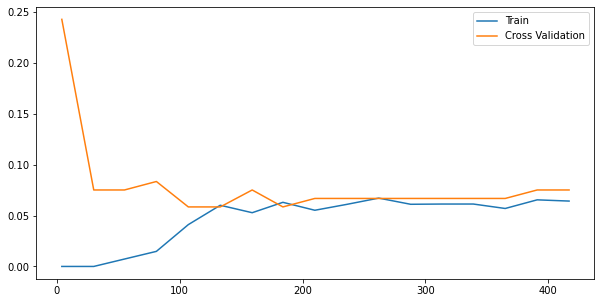

In [31]:
f, ax = plt.subplots(figsize=(10, 5))

ax.plot(train_sizes_abs, train_scores_mean, label='Train')
ax.plot(train_sizes_abs, cv_scores_mean, label='Cross Validation')

ax.legend()

#### Fitting the model

In [32]:
model = svm.SVC(C=0.1, gamma=0.001, kernel='linear')
model.fit(X_train, y_train)

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

#### Predicting

In [33]:
y_test_pred = model.predict(X_test)

#### Evaluating Model

In [34]:
from sklearn.metrics import f1_score, precision_score, recall_score, jaccard_similarity_score

In [35]:
# Metrics

print(model.score(X_test, y_test))
print(f1_score(y_test, y_test_pred, average="weighted"))
print(precision_score(y_test, y_test_pred, average="weighted"))
print(recall_score(y_test, y_test_pred, average="weighted"))
print(jaccard_similarity_score(y_test, y_test_pred))

0.9414634146341463
0.9417936210131332
0.9428808995882166
0.9414634146341463
0.9414634146341463


In [36]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           2       0.97      0.94      0.95       132
           4       0.90      0.95      0.92        73

    accuracy                           0.94       205
   macro avg       0.93      0.94      0.94       205
weighted avg       0.94      0.94      0.94       205

Confusion matrix, without normalization
[[124   8]
 [  4  69]]


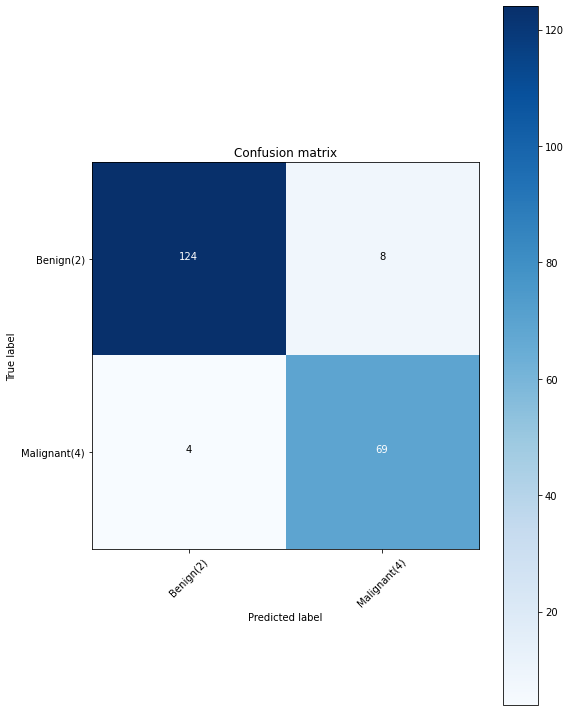

In [37]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_test_pred, labels=[2,4])
np.set_printoptions(precision=2)

print(classification_report(y_test, y_test_pred))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Benign(2)','Malignant(4)'],normalize= False,  title='Confusion matrix')

#### Creating Pipeline

In [38]:
from sklearn.pipeline import Pipeline

In [39]:
scaling = ('scale', StandardScaler())
model = ('model', svm.SVC(C=0.1, gamma=0.001, kernel='linear'))

# Steps in the pipeline
steps = [scaling, model]

pipe = Pipeline(steps=steps)

# Fiitting the model
model = pipe.fit(X_train, y_train)

# Out-Of-Sample Forecast
y_test_pred = model.predict(X_test)

# Evaluation

print(f'Model Score: {model.score(X_test, y_test)}')
print(f'f1-score: {f1_score(y_test, y_test_pred, average="weighted")}')
print(f'precision score: {precision_score(y_test, y_test_pred, average="weighted")}')
print(f'recall score: {recall_score(y_test, y_test_pred, average="weighted")}')
print(f'jaccard similarity score: {jaccard_similarity_score(y_test, y_test_pred)}')

Model Score: 0.9414634146341463
f1-score: 0.9417936210131332
precision score: 0.9428808995882166
recall score: 0.9414634146341463
jaccard similarity score: 0.9414634146341463


#### Saving the model

In [40]:
from joblib import dump, load

dump(model, 'model.joblib') 

['model.joblib']

<hr>